In [1]:
from utils_visualization import*

# Generate data clean

In [2]:
data_clean=pd.read_excel('dataNew/sharks.xlsx')
data_clean=data_clean.fillna("unknown")

In [3]:
data_clean["fatal"]=data_clean["Fatal(Y/N)"]
data_clean=data_clean.drop(columns=["Fatal(Y/N)"])

# Preprocessing

In [4]:
name="data/sharks"
data=generate_data(name_file=name)

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Time', 'Species',
       'Investigator-Source', 'pdf', 'href-formula', 'href', 'Case-Number',
       'original-order', 'latitude', 'longitude', 'fatal'],
      dtype='object')


In [5]:
sub_df=data_clean[["Date","Year","Sex","Age","Time",'Activity','Injury','Type','Country', 'Area', 'Location','Species','latitude', 'longitude','fatal']].copy()

In [6]:
#replace '' by 'missing'
sub_df=fill_missing_value(data=sub_df)
sub_df.describe()

,Date,Year,Sex,Age,Time,Activity,Injury,Type,Country,Area,Location,Species,latitude,longitude,fatal
count,6448,6448,6448,6448,6448,6448,6448,6448,6448,6448,6448,6448,6448,6448,6448
unique,5551,252,7,153,367,1543,3830,11,214,843,4423,1576,3315,3304,7
top,1957,2015,M,Missing,Missing,Surfing,FATAL,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Missing,Missing,Missing,N
freq,11,141,5209,2867,3390,1009,811,4703,2310,1071,172,2911,201,201,4430


In [7]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       6448 non-null   object
 1   Year       6448 non-null   object
 2   Sex        6448 non-null   object
 3   Age        6448 non-null   object
 4   Time       6448 non-null   object
 5   Activity   6448 non-null   object
 6   Injury     6448 non-null   object
 7   Type       6448 non-null   object
 8   Country    6448 non-null   object
 9   Area       6448 non-null   object
 10  Location   6448 non-null   object
 11  Species    6448 non-null   object
 12  latitude   6448 non-null   object
 13  longitude  6448 non-null   object
 14  fatal      6448 non-null   object
dtypes: object(15)
memory usage: 755.8+ KB


In [8]:
sub_df=dfFloat_to_dfStr(df=sub_df)

# Transformation du temps

In [9]:
new_timeSeries,time_in_second,formats=get_second_from_format_hms(timeSeries=sub_df.Time)
sub_df.Time=new_timeSeries

# Transformation de l'Age

In [10]:
sub_df.Age=sub_df.Age.apply(remove_whitespace)
new_AgeSeries=filter_Age(data=sub_df)
sub_df.Age=new_AgeSeries

6448


# Transformation de fatal

In [11]:
new_fatalSeries=filter_fatal(data=sub_df)
sub_df.fatal=new_fatalSeries

6448


# Transformation du Sex

In [12]:
new_SexSeries=filter_sex(data=sub_df)
sub_df.Sex=new_SexSeries

6448


# Transformation Year

In [13]:
new_YearSeries=filter_year(data=sub_df)
sub_df.Year=new_YearSeries

6448


# Transformation Month

In [14]:
month=filter_month(data=sub_df)
sub_df["Months"]=month

6448


# Transformation du jour

In [15]:
jour=filter_jour(data=sub_df)  
sub_df["Days"]=jour

6448


## Transformation of hours

In [16]:
hours=get_hours(Month=sub_df["Months"],Year=sub_df["Year"],Day=sub_df["Days"],Time_in_second=time_in_second)
sub_df["Hours"]=hours

6448


# New data

In [17]:
new_sub_df=sub_df.drop(columns=["Date"])
new_sub_df

,Year,Sex,Age,Time,Activity,Injury,Type,Country,Area,Location,Species,latitude,longitude,fatal,Months,Days,Hours
0,2019,Male,40,11h55,Surfing,Hand and calf bitten when he jumped off surfbo...,Provoked,USA,Florida,"New Smyrna Beach, Volusia County",6.5' shark,29.0258191,-80.9269984,Alive,Aug,27,2019-08-27 11:55:00
1,2019,Male,11,09h00,Wading,Foot bitten,Unprovoked,USA,Florida,"Fort Lauderdale, Broward County",Missing,26.1224386,-80.13731740000001,Alive,Aug,21,2019-08-21 09:00:00
2,2019,Female,26,08h00,Swimming,Injury to lower back and right hip,Unprovoked,USA,Hawaii,"Napoopoo Park in Kealakekua Bay, The Big Island",Missing,19.4782437,-155.9259272,Alive,Aug,20,2019-08-20 08:00:00
3,2019,Male,9,11h00,Wading,Puncture marks to lower leg,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Missing,29.0258191,-80.9269984,Alive,Aug,16,2019-08-16 11:00:00
4,2019,Male,16,19h30,Surfing,"No injury, board damaged",Unprovoked,USA,Hawaii,"Makaha Beach, Oahu",10' to 12' shark,21.4763581,-158.2203658,Alive,Aug,11,2019-08-11 19:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6443,1903,Male,Missing,Missing,Diving,FATAL,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Missing,-18.0858333,122.2830556,Dead,Missing,Missing,Missing
6444,1903,Male,Missing,Missing,Pearl diving,FATAL,Unprovoked,AUSTRALIA,Western Australia,"Lake Darlot, Shire Of Leonora, Western Austral...",Missing,-27.6728168,121.6283098,Dead,Missing,Missing,Missing
6445,1900,Male,Missing,Missing,Swimming,FATAL,Unprovoked,USA,North Carolina,Ocracoke Inlet,Missing,35.0861054,-76.0333885,Dead,Missing,Missing,Missing
6446,1883,Male,Missing,Missing,Missing,FATAL,Unprovoked,PANAMA,Missing,"Panama Bay 8ºN, 79ºW",Missing,Missing,Missing,Dead,Missing,Missing,Missing


In [18]:
new_sub_df.describe()

,Year,Sex,Age,Time,Activity,Injury,Type,Country,Area,Location,Species,latitude,longitude,fatal,Months,Days,Hours
count,6448,6448,6448,6448,6448,6448,6448,6448,6448,6448,6448,6448,6448,6448,6448,6448,6448
unique,252,3,82,255,1543,3830,11,214,843,4423,1576,3315,3304,3,13,32,2417
top,2015,Male,Missing,Missing,Surfing,FATAL,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Missing,Missing,Missing,Alive,Jul,Missing,Missing
freq,143,5209,2900,3984,1009,811,4703,2310,1071,172,2911,201,201,4430,702,907,3984


In [19]:
df_save=new_sub_df.drop(columns=["Hours"])
df_save.to_excel("dataNew/New_shark.xlsx",index=False)

In [20]:
df=filter_tyte_TimeStamp(data=new_sub_df)
df

,Year,Sex,Age,Time,Activity,Injury,Type,Country,Area,Location,Species,latitude,longitude,fatal,Months,Days,Hours
0,2019,Male,40,11h55,Surfing,Hand and calf bitten when he jumped off surfbo...,Provoked,USA,Florida,"New Smyrna Beach, Volusia County",6.5' shark,29.0258191,-80.9269984,Alive,Aug,27,2019-08-27 11:55:00
1,2019,Male,11,09h00,Wading,Foot bitten,Unprovoked,USA,Florida,"Fort Lauderdale, Broward County",Missing,26.1224386,-80.13731740000001,Alive,Aug,21,2019-08-21 09:00:00
2,2019,Female,26,08h00,Swimming,Injury to lower back and right hip,Unprovoked,USA,Hawaii,"Napoopoo Park in Kealakekua Bay, The Big Island",Missing,19.4782437,-155.9259272,Alive,Aug,20,2019-08-20 08:00:00
3,2019,Male,9,11h00,Wading,Puncture marks to lower leg,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Missing,29.0258191,-80.9269984,Alive,Aug,16,2019-08-16 11:00:00
4,2019,Male,16,19h30,Surfing,"No injury, board damaged",Unprovoked,USA,Hawaii,"Makaha Beach, Oahu",10' to 12' shark,21.4763581,-158.2203658,Alive,Aug,11,2019-08-11 19:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2411,1830,Male,Missing,17h00,Bathing,FATAL,Unprovoked,INDIA,Tamil Nadu,St. Thomé,Missing,44.5005626,4.6263047,Dead,Apr,30,1830-04-30 17:00:00
2412,1826,Male,Missing,19h00,Jumped overboard,FATAL,Unprovoked,JAMAICA,Missing,"Clarendon, Middlesex County, Jamaica",Missing,18.109581,-77.297508,Dead,May,20,1826-05-20 19:00:00
2413,1817,Male,Missing,13h00,Conch diver,Abdomen bitten,Unprovoked,SRI LANKA,Missing,Gulf of Mannar,Missing,8.980974300000002,79.90441489999999,Alive,Feb,22,1817-02-22 13:00:00
2414,1784,Male,Missing,22h00,Swimming,Missing,Unprovoked,JAMAICA,Missing,Kingston,Missing,18.0178743,-76.8099041,Dead,Dec,12,1784-12-12 22:00:00


In [21]:
df.loc[3]

Year                                     2019
Sex                                      Male
Age                                         9
Time                                    11h00
Activity                               Wading
Injury            Puncture marks to lower leg
Type                               Unprovoked
Country                                   USA
Area                                  Florida
Location     New Smyrna Beach, Volusia County
Species                               Missing
latitude                           29.0258191
longitude                         -80.9269984
fatal                                   Alive
Months                                    Aug
Days                                       16
Hours                     2019-08-16 11:00:00
Name: 3, dtype: object

# Missing value

In [22]:
def unique_value(data=None,col=None):
    values=data[col].values.tolist()
    frame={"unique":values,"count":[1 for i in range(len(values))]}
    df=pd.DataFrame(frame)
    sd=df.groupby(by="unique").count().reset_index(drop=False)
    missing=sd[sd.unique=="Missing"]
    wrong_format=sd[sd.unique=="Missing"]
    print(f"Missing:{missing['count']}\n\nMissing:{wrong_format['count']}")

In [23]:
unique_value(data=new_sub_df,col="Months")

Missing:9    519
Name: count, dtype: int64

Missing:9    519
Name: count, dtype: int64


# Plot biblio

## plot by year

<Axes: xlabel='count', ylabel='Year'>

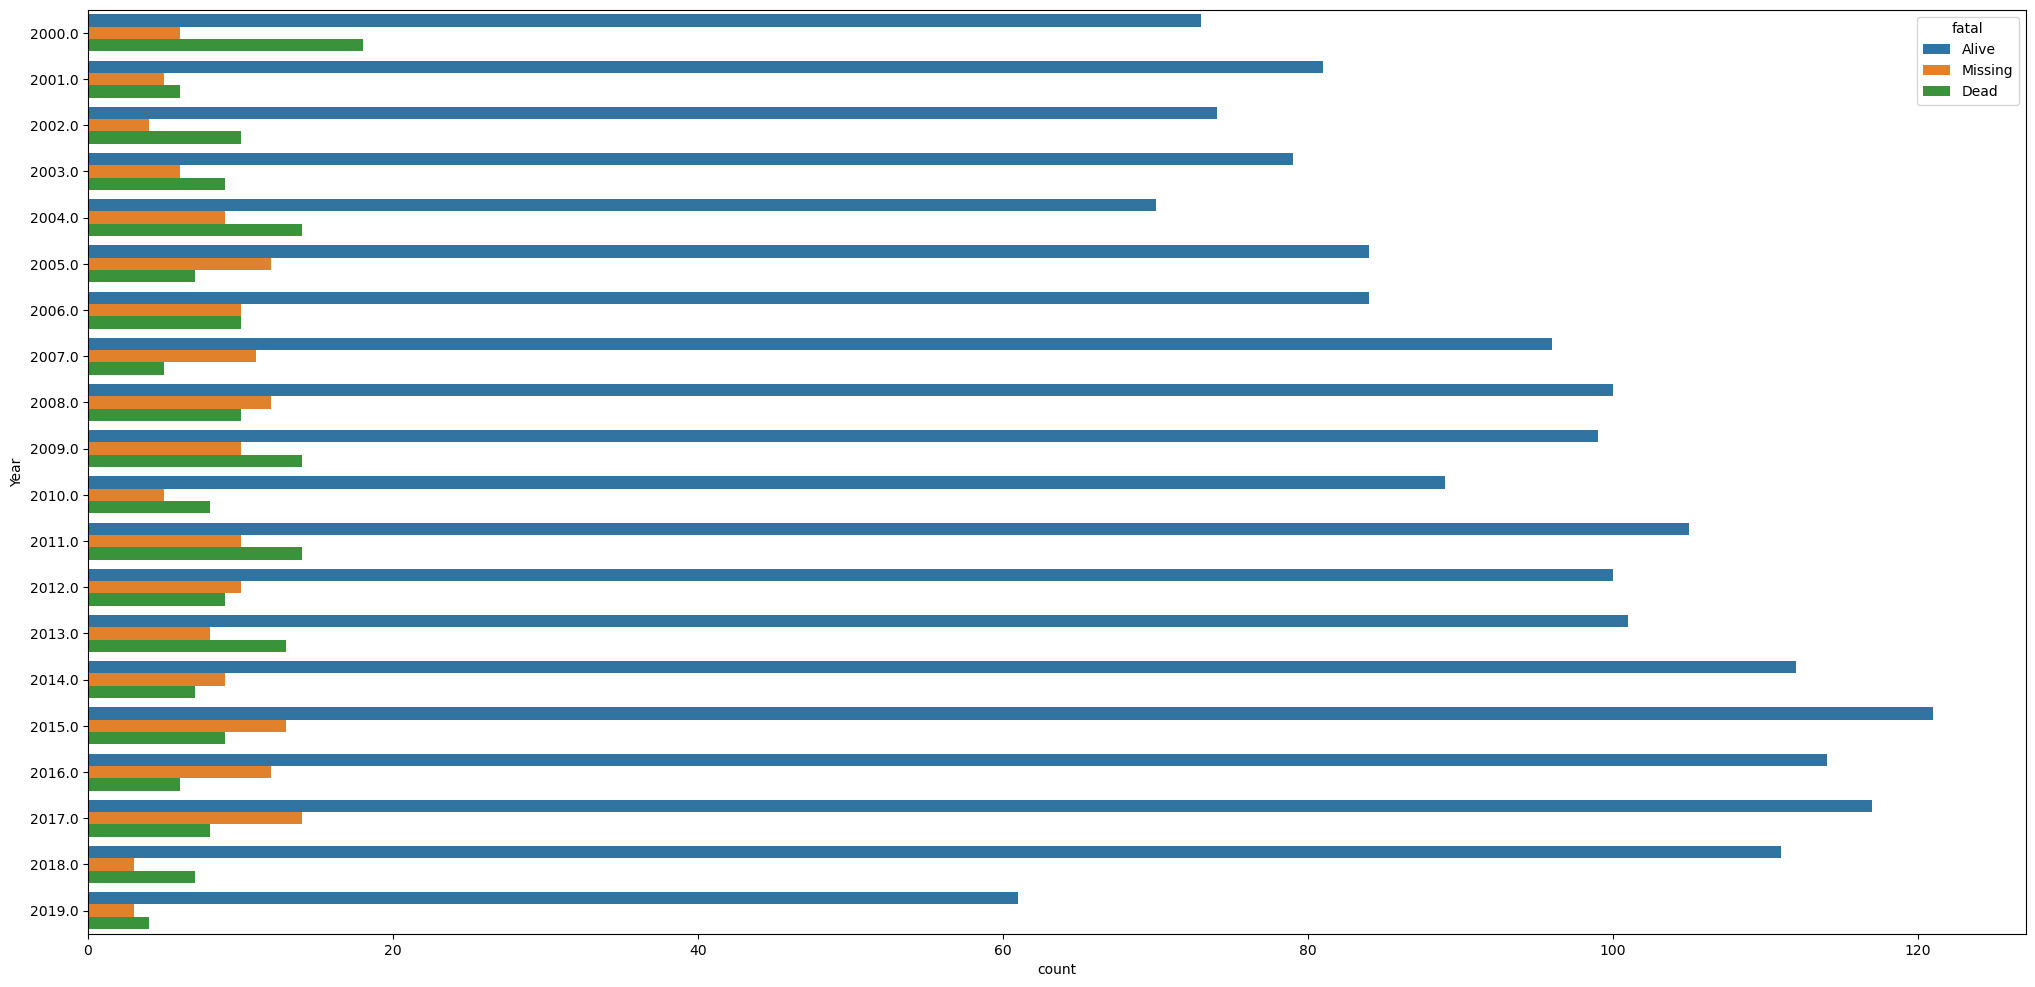

In [24]:
temp=sub_df
temp["Year"]=temp["Year"].apply(convert_str_to_float).copy()
temp=temp[1999<temp.Year]
fig=plt.figure(figsize=(25,12))
sns.countplot(data=temp, y="Year", hue="fatal")

In [25]:
temp=sub_df
temp["Year"]=temp["Year"].apply(convert_str_to_float).copy()
temp=temp[1800<temp.Year]
temp=temp.groupby(by="Year").count().reset_index(drop=False)

<Axes: xlabel='Year', ylabel='fatal'>

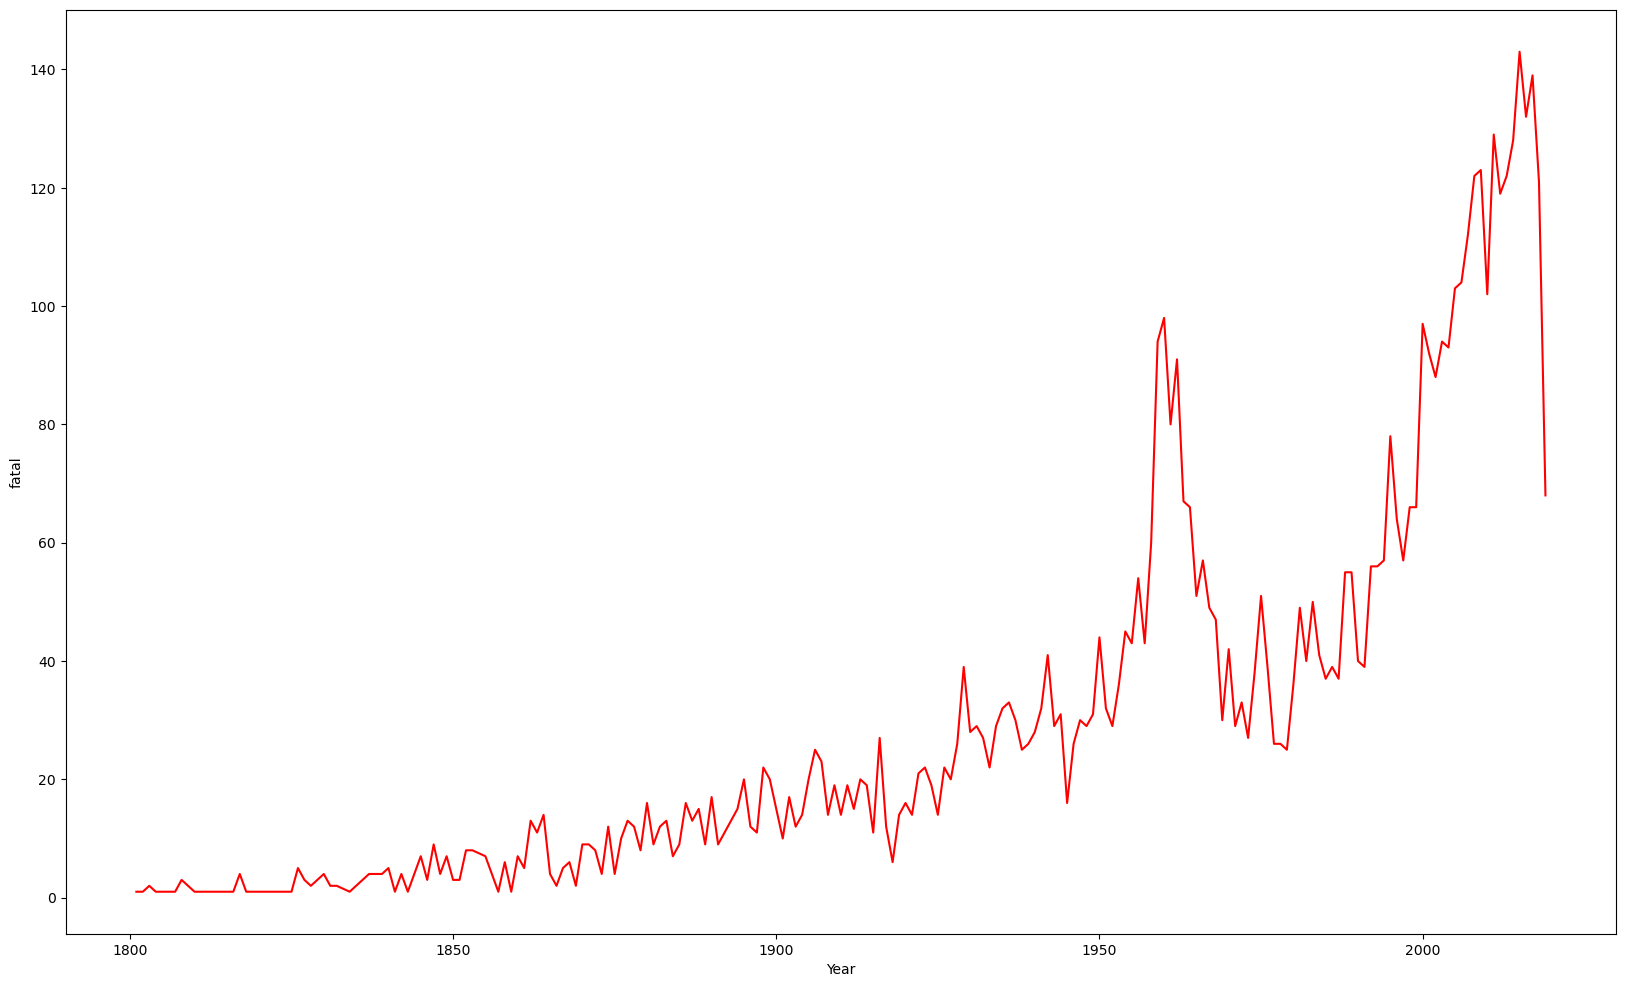

In [26]:
fig=plt.figure(figsize=(20,12))
sns.lineplot(data=temp,x="Year",y="fatal",color="r")

In [27]:
months=list({'Jan':1,'Feb':2,'Mar':3,'Apr':4,
            'May':5,'Jun':6,'Jul':7,'Aug':8,
            'Sep':9,'Oct':10,'Nov':11,'Dec':12,"Missing":-1}.keys())
months

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec',
 'Missing']

In [28]:
temp=sub_df
temp=temp[1800<temp.Year][["Months","fatal"]].groupby(by="Months").count().reset_index(drop=False)
temp

,Months,fatal
0,Apr,462
1,Aug,626
2,Dec,441
3,Feb,388
4,Jan,522
5,Jul,699
6,Jun,507
7,Mar,421
8,May,406
9,Missing,477


<Axes: xlabel='Months', ylabel='count'>

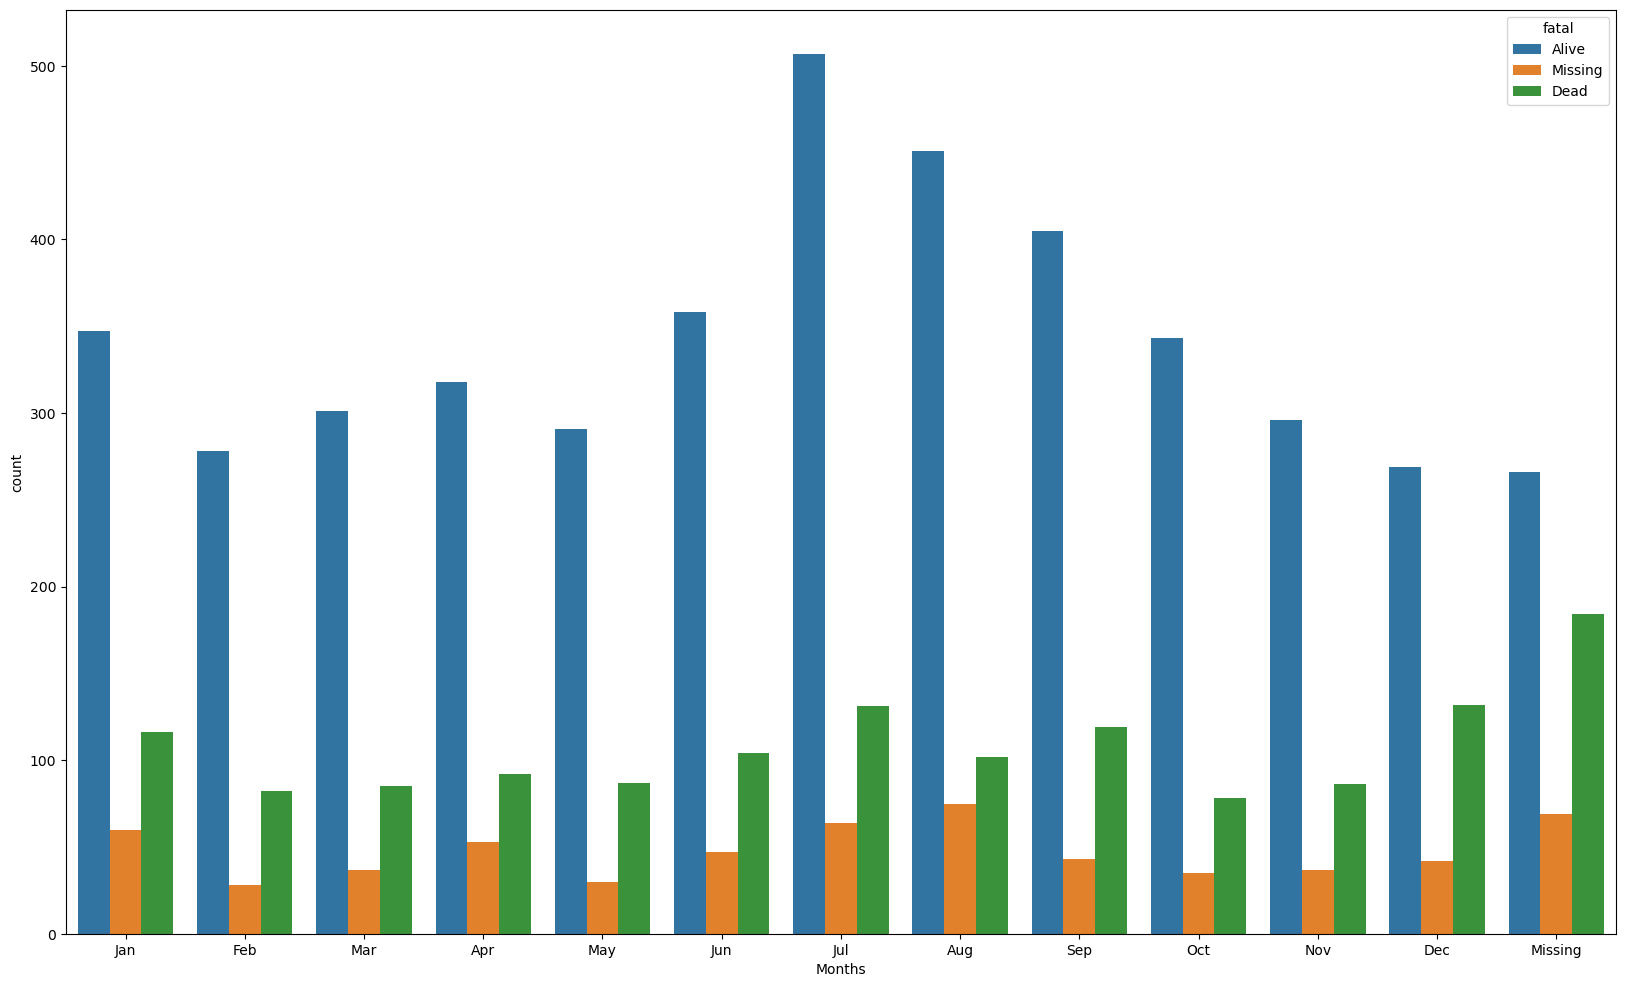

In [29]:
fig,ax=plt.subplots(figsize=(20,12))
sns.countplot(data=sub_df,x="Months",hue="fatal",ax=ax, order=months)
#xticks=ax.set_xticks(x+width,months)

##  plot Age et sex

In [30]:

#Male
temp=sub_df
temp["Age"]=temp["Age"].apply(convert_str_to_float).copy()

temp=temp[temp.Sex=="Male"][["Age","fatal"]].groupby(by="Age").count().reset_index(drop=False)
temp1=temp[0<temp.Age]

#Female
temp=sub_df
temp["Age"]=temp["Age"].apply(convert_str_to_float).copy()
temp=temp[temp.Sex=="Female"][["Age","fatal"]].groupby(by="Age").count().reset_index(drop=False)
temp2=temp[0<temp.Age]

Text(0, 0.5, 'Count')

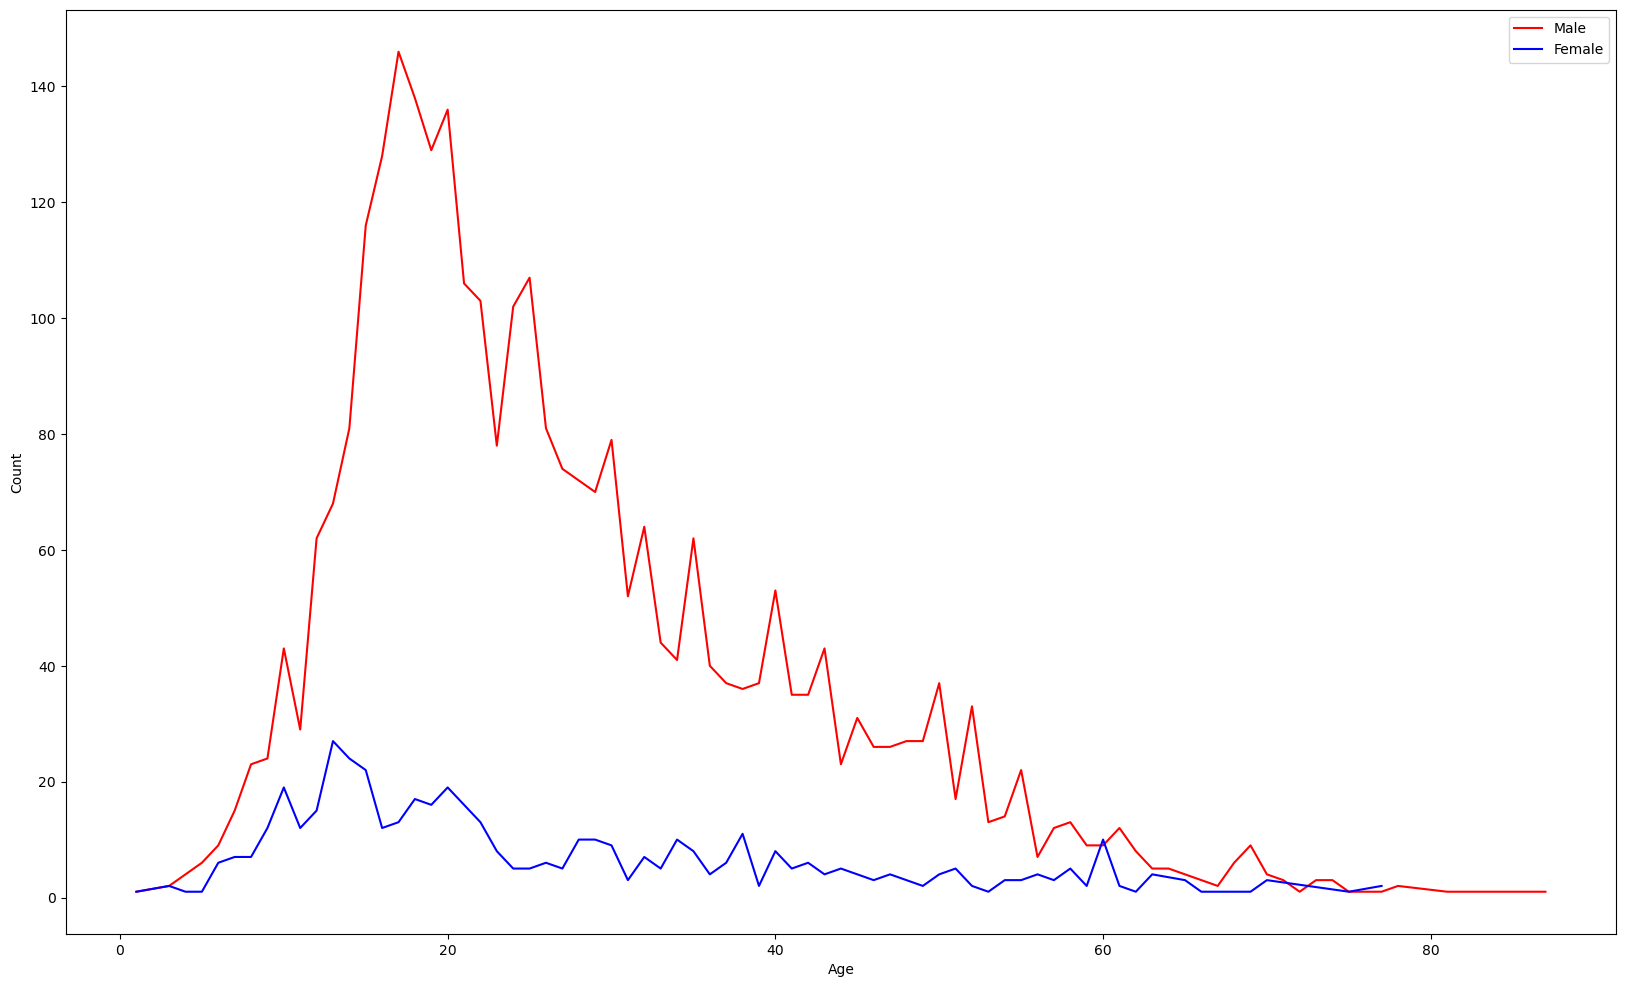

In [31]:
fig=plt.figure(figsize=(20,12))
plt.plot(temp1.Age,temp1.fatal,color="r")
plt.plot(temp2.Age,temp2.fatal,color="b")
plt.legend(["Male","Female"])
plt.xlabel("Age")
plt.ylabel("Count")

## plot female and male

In [32]:
#Male
temp=sub_df
temp["Year"]=temp["Year"].apply(convert_str_to_float).copy()

temp=temp[temp.Sex=="Male"][["Year","fatal"]].groupby(by="Year").count().reset_index(drop=False)
temp1=temp[1800<temp.Year]

#Female
temp=sub_df
temp["Year"]=temp["Year"].apply(convert_str_to_float).copy()
temp=temp[temp.Sex=="Female"][["Year","fatal"]].groupby(by="Year").count().reset_index(drop=False)
temp2=temp[1800<temp.Year]

In [33]:
temp=sub_df
temp["Year"]=temp["Year"].apply(convert_str_to_float).copy()

temp=temp[temp.fatal=="Dead"][["Year","fatal"]].groupby(by="Year").count().reset_index(drop=False)
temp=temp[1800<temp.Year]

In [34]:
sum(temp.fatal)

1366

In [35]:
#Numbre of attack
sum(temp1.fatal)+sum(temp2.fatal)

5824

Text(0, 0.5, 'Count')

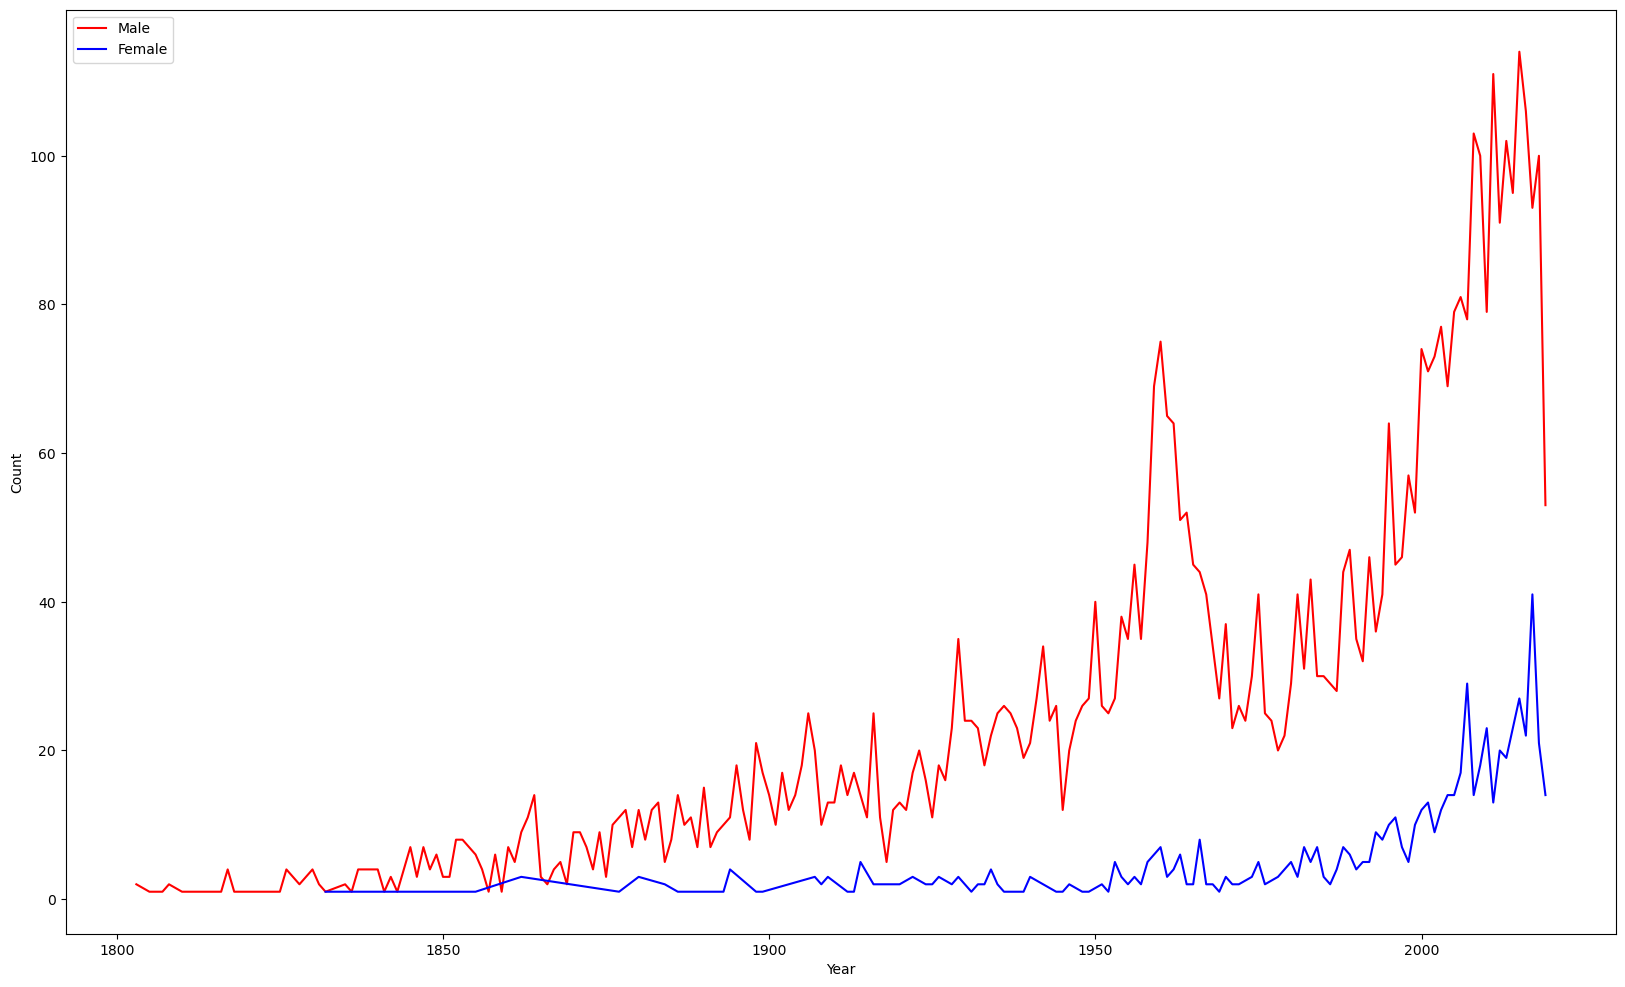

In [36]:
fig=plt.figure(figsize=(20,12))
plt.plot(temp1.Year,temp1.fatal,color="r")
plt.plot(temp2.Year,temp2.fatal,color="b")
plt.legend(["Male","Female"])
plt.xlabel("Year")
plt.ylabel("Count")

<Axes: xlabel='Count', ylabel='Sex'>

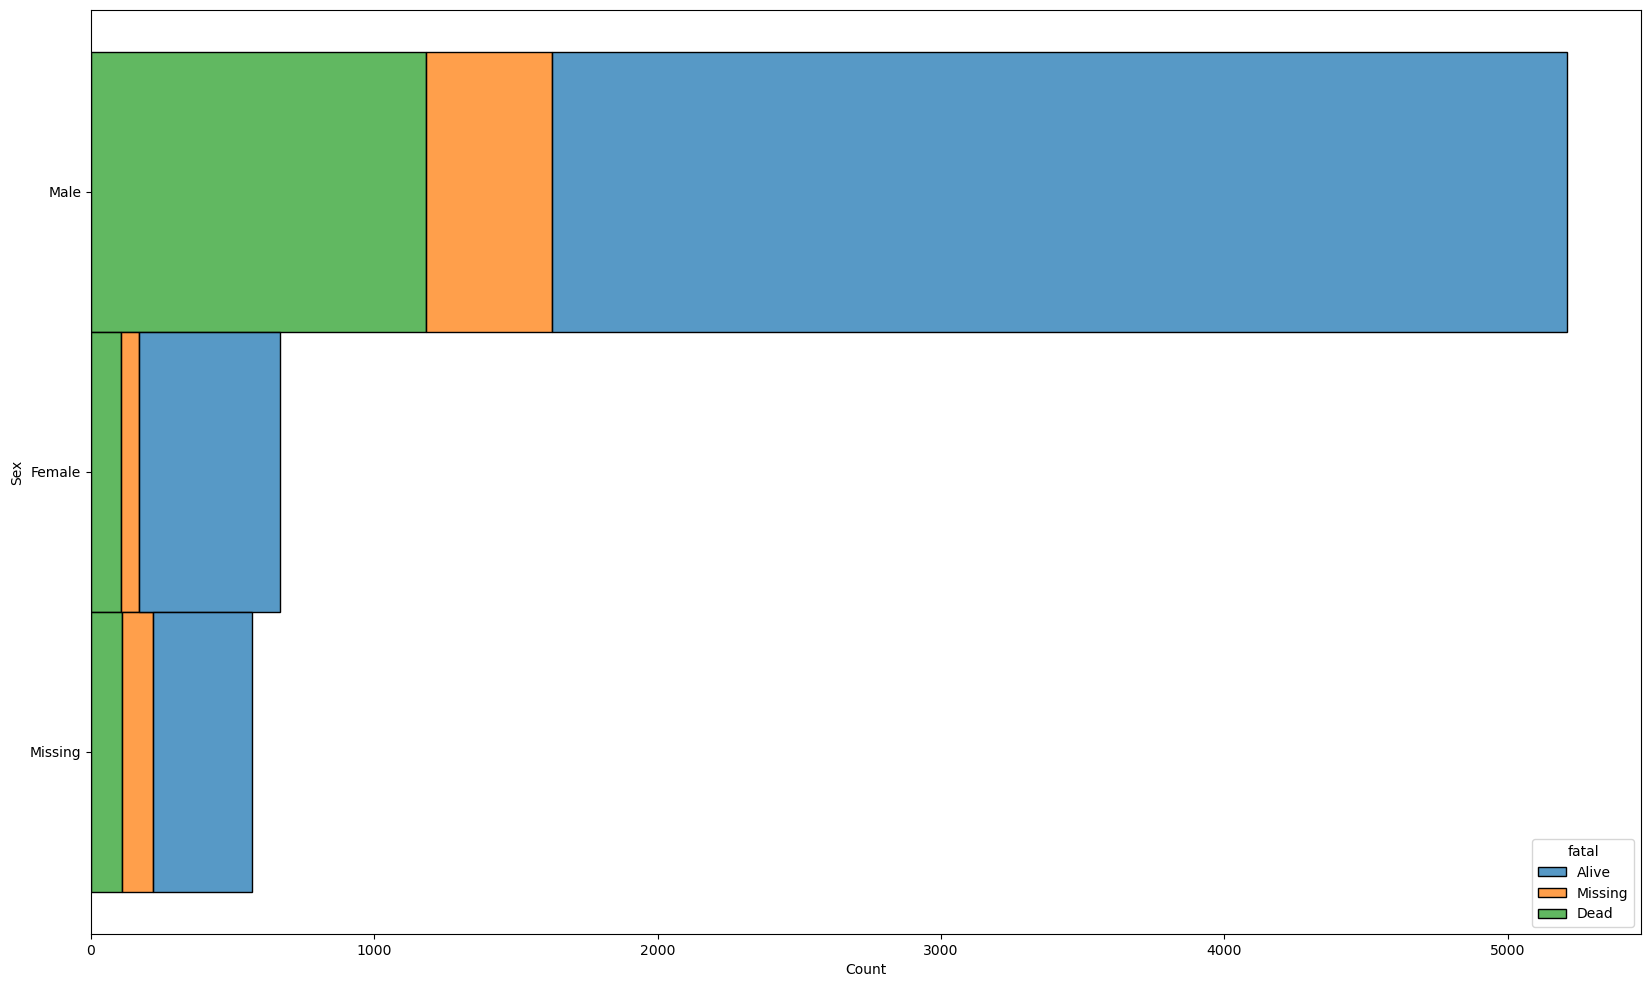

In [37]:
fig=plt.figure(figsize=(20,12))
sns.histplot(data=sub_df,y="Sex",hue="fatal",multiple="stack",binwidth=5)

## plot location : Country and area

In [38]:
temp=sub_df
temp=temp[["Country","fatal"]].groupby(by="Country").count().reset_index(drop=False).sort_values(by="fatal",ascending=False)
temp=temp[100<temp.fatal].rename(columns={"fatal":"Count"})
temp

,Country,Count
206,USA,2310
14,AUSTRALIA,1363
173,SOUTH AFRICA,583
147,PAPUA NEW GUINEA,134
129,NEW ZEALAND,133
16,BAHAMAS,121
23,BRAZIL,114


<Axes: xlabel='Country', ylabel='Count'>

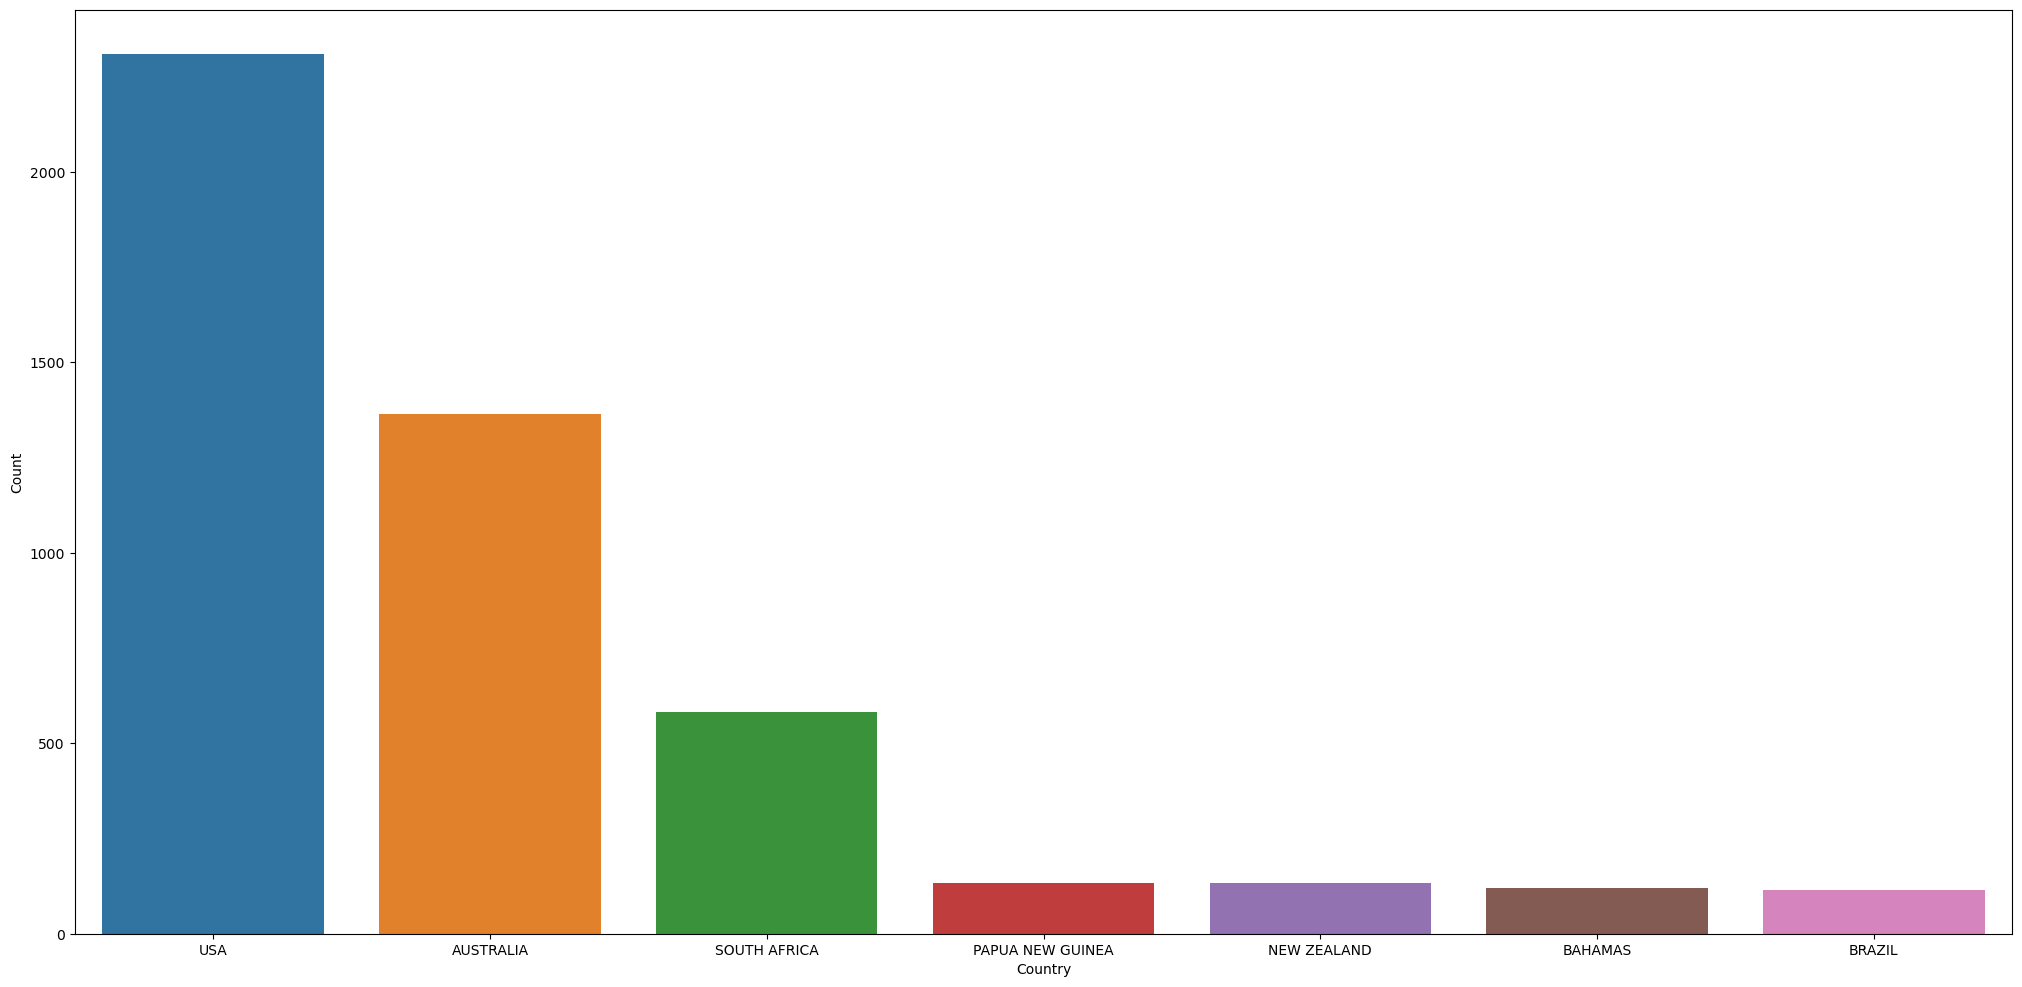

In [39]:
fig=plt.figure(figsize=(25,12))
sns.barplot(data=temp, x="Country",y="Count")

In [40]:
temp=sub_df
temp=temp[["Area","fatal"]].groupby(by="Area").count().reset_index(drop=False).sort_values(by="fatal",ascending=False)
temp=temp[100<temp.fatal]
temp=temp.drop(462)
temp

,Area,fatal
268,Florida,1071
505,New South Wales,494
600,Queensland,320
320,Hawaii,309
159,California,297
375,KwaZulu-Natal,215
825,Western Cape Province,195
823,Western Australia,193
248,Eastern Cape Province,162
696,South Carolina,161


<Axes: xlabel='fatal', ylabel='Area'>

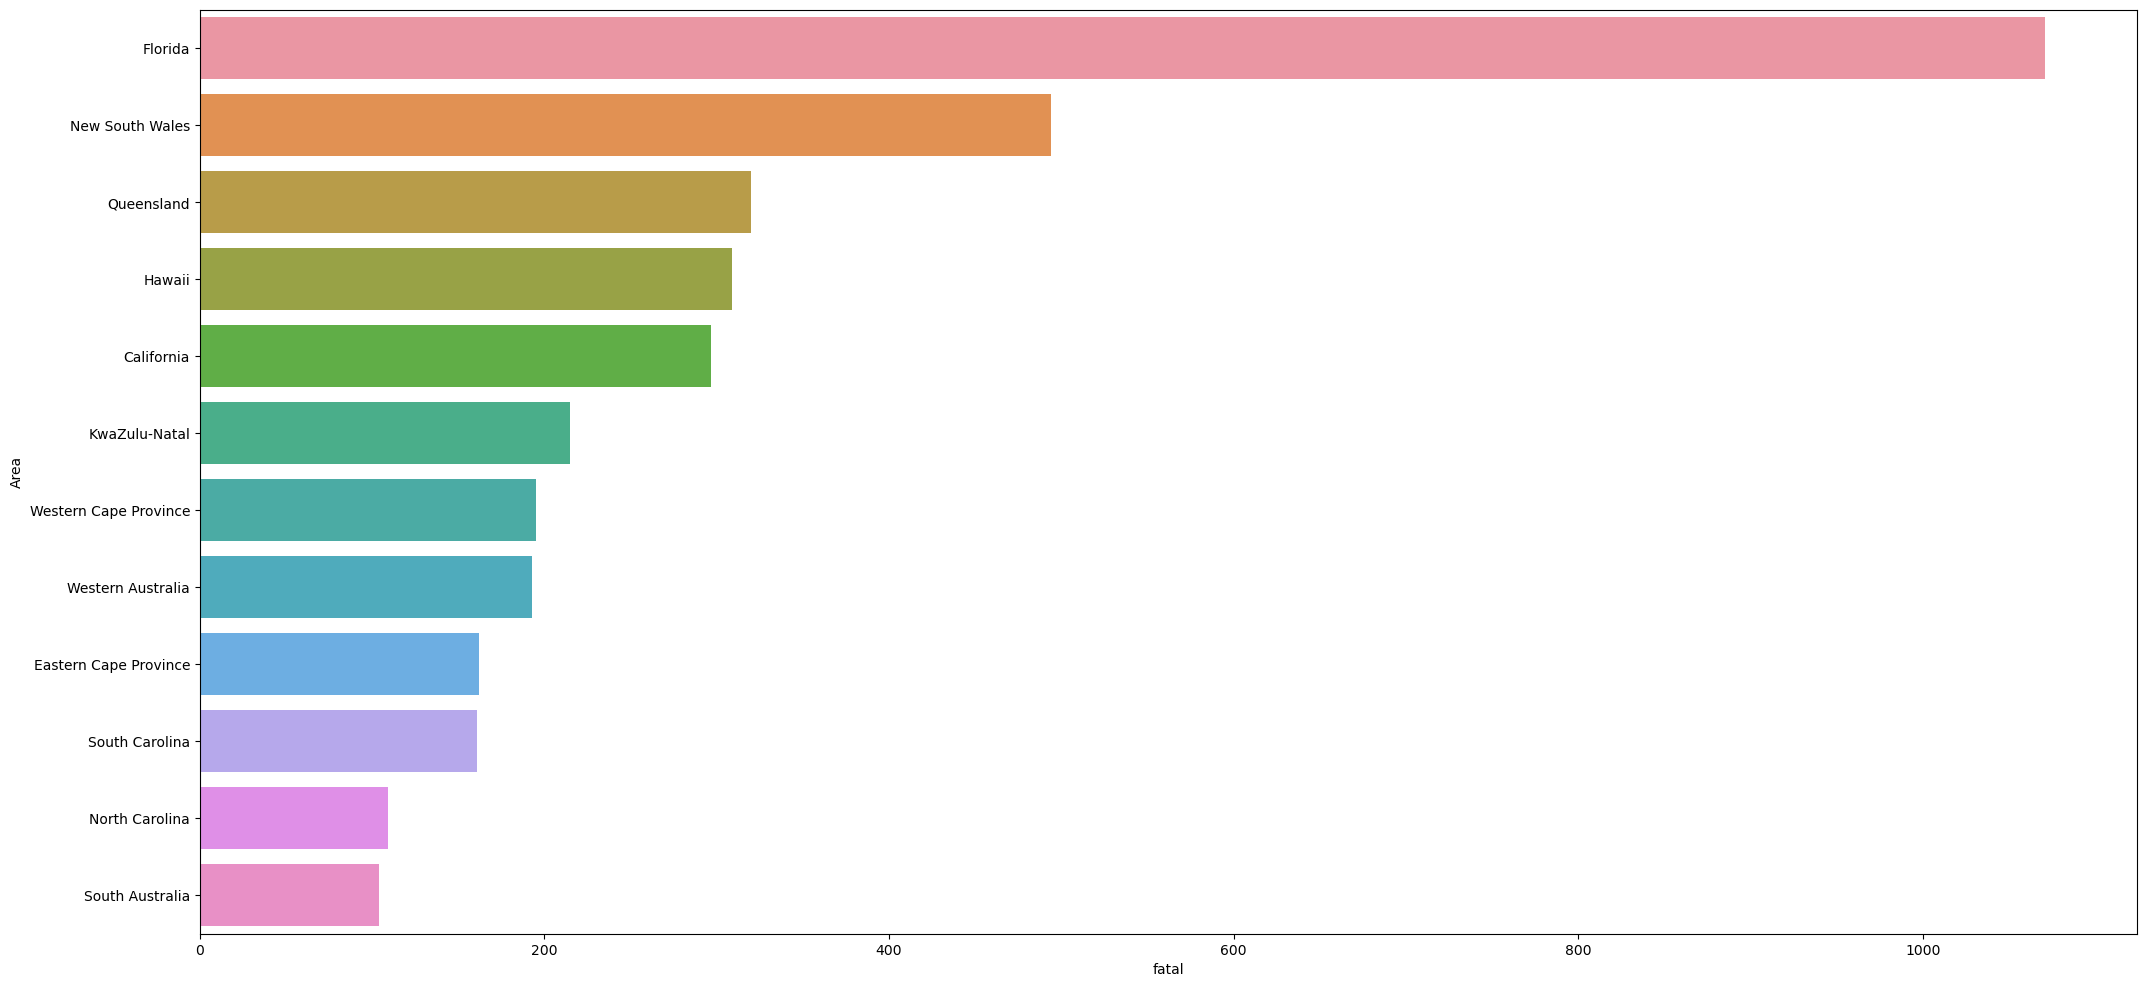

In [41]:
fig=plt.figure(figsize=(25,12))
sns.barplot(data=temp, y="Area",x="fatal")

## plot Activity species and type

In [42]:
temp=sub_df
temp=temp[["Species","fatal"]].groupby(by="Species").count().reset_index(drop=False).sort_values(by="fatal",ascending=True)
temp=temp[(21<temp.fatal) & (temp.fatal<500)]
temp.shape

(20, 2)

<Axes: xlabel='fatal', ylabel='Species'>

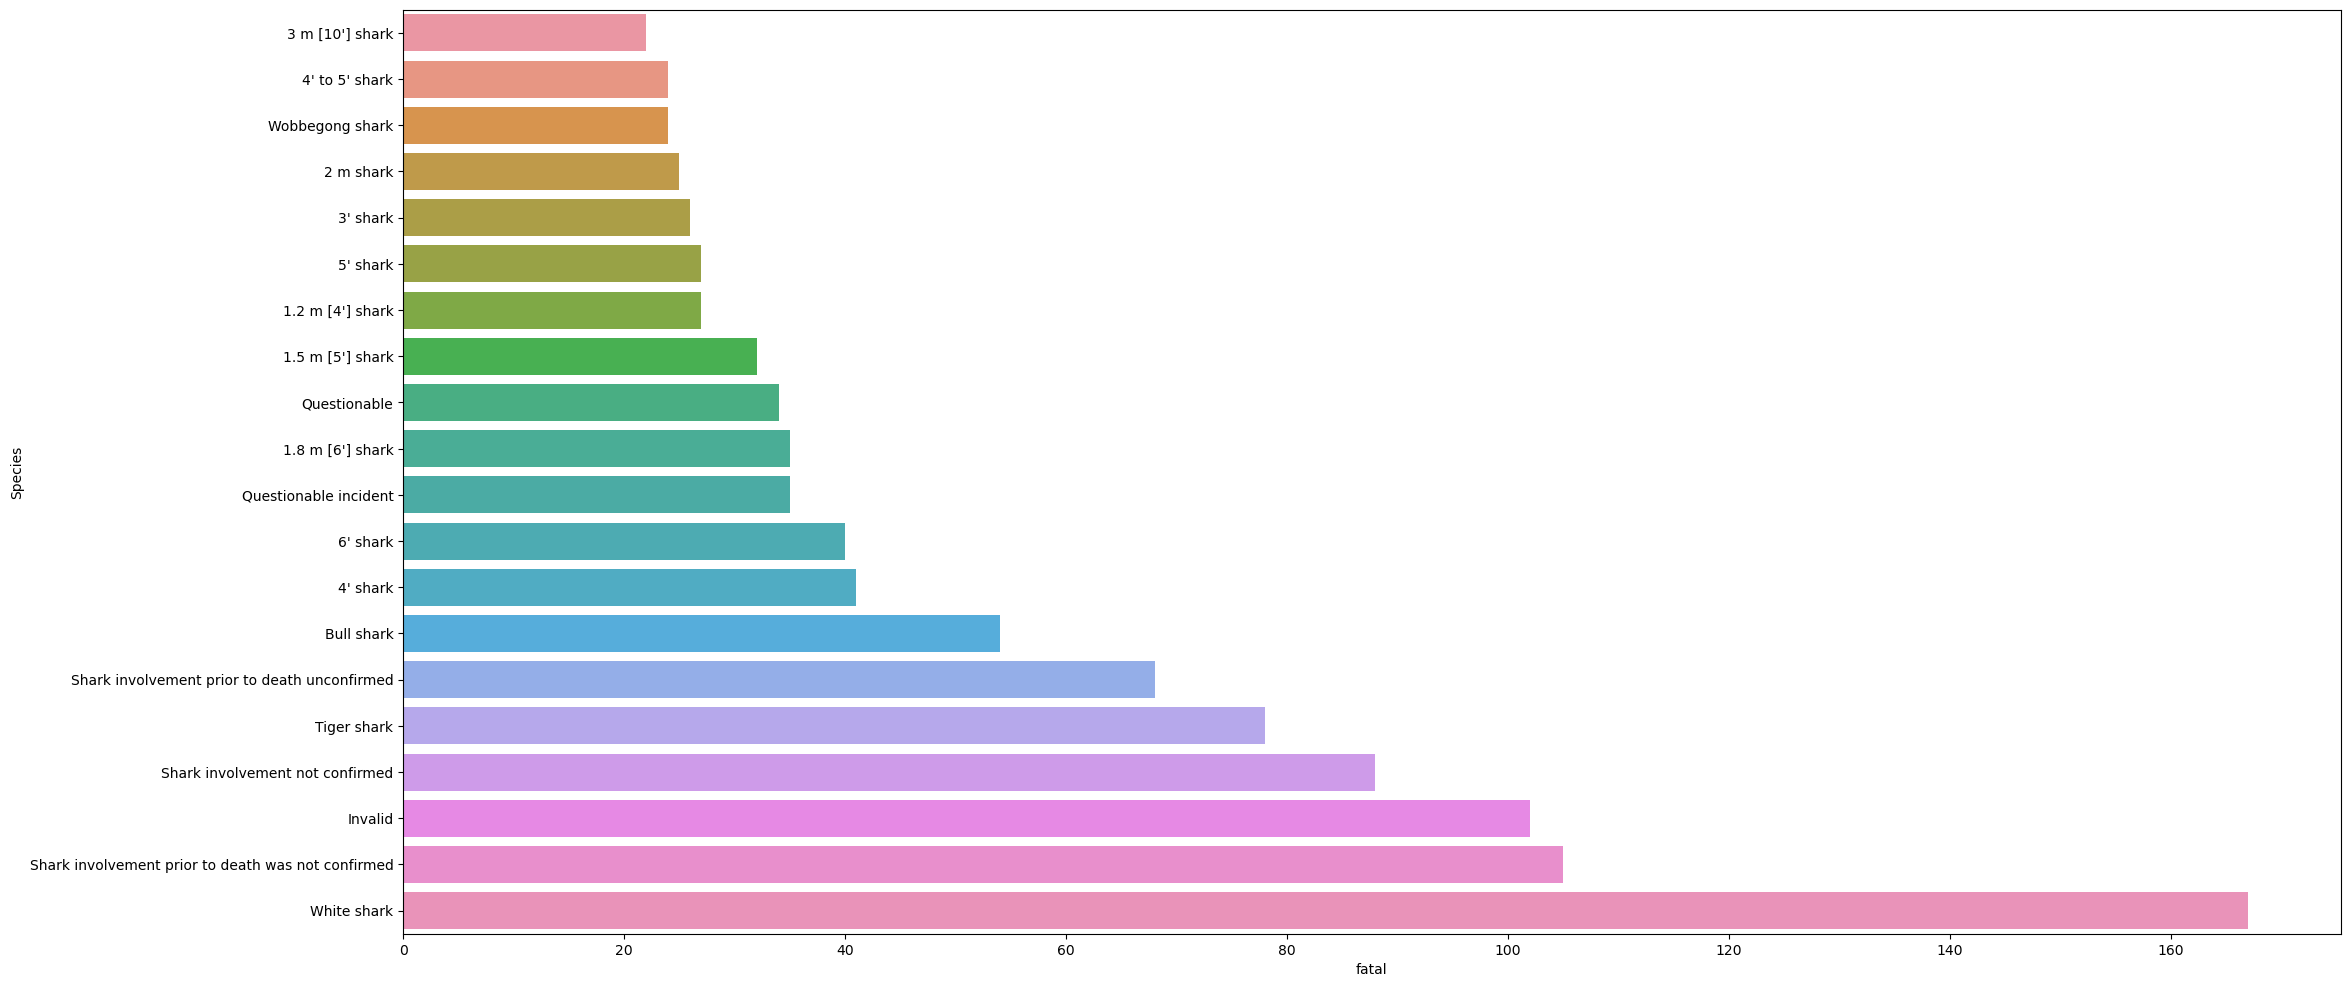

In [43]:
fig=plt.figure(figsize=(25,12))
sns.barplot(data=temp, y="Species",x="fatal")

Text(0, 0.5, 'Species')

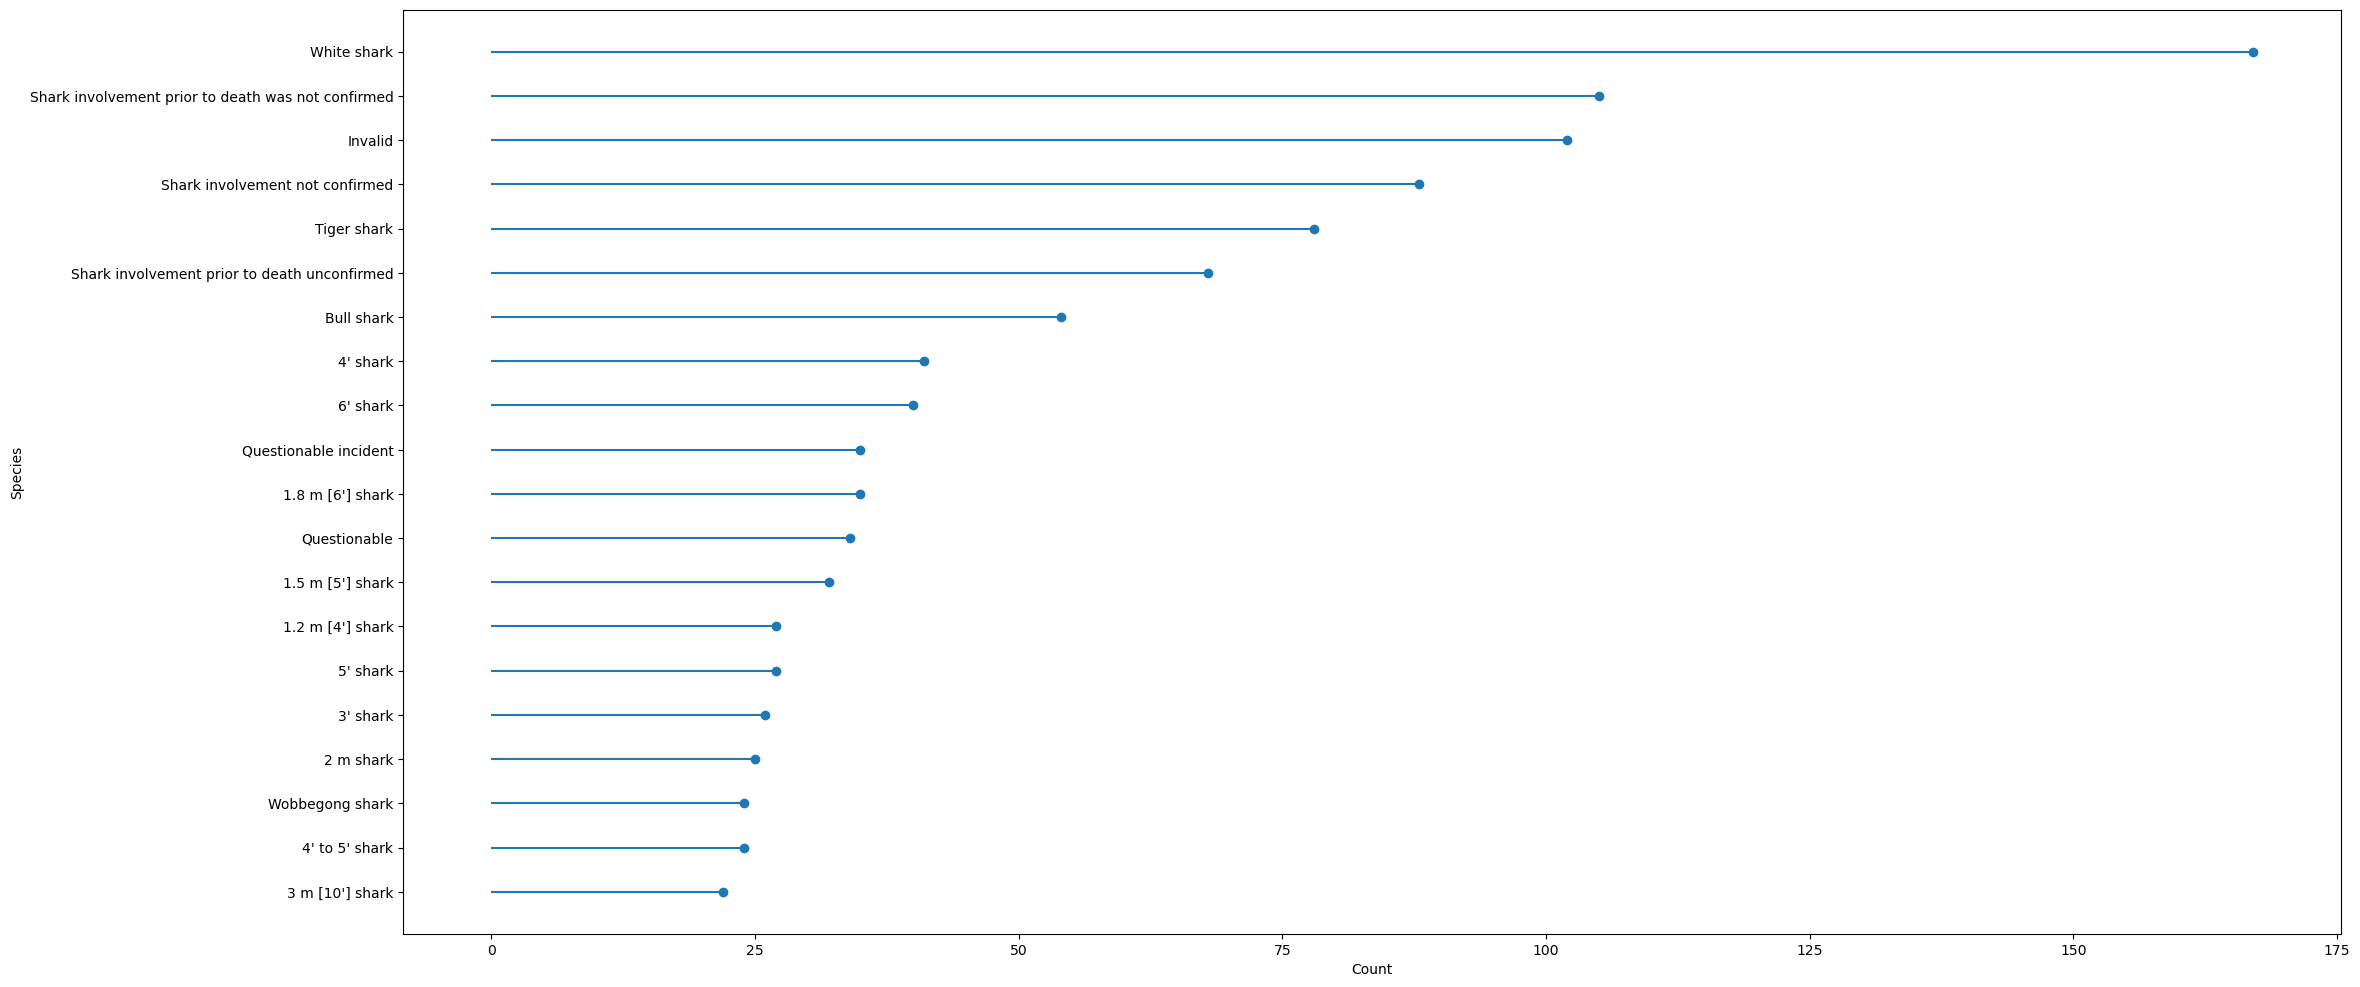

In [44]:
# creating an empty chart 
fig, ax= plt.subplots(figsize=(25,12)) 
# plotting using plt.stem 
ax.stem(temp['Species'], temp['fatal'], orientation='horizontal', basefmt=' ')
plt.xlabel("Count")
plt.ylabel("Species")

In [45]:
temp=sub_df
temp=temp[["Activity","fatal"]].groupby(by="Activity").count().reset_index(drop=False).sort_values(by="fatal",ascending=False)
temp=temp[90<temp.fatal]
temp

,Activity,fatal
1164,Surfing,1009
1201,Swimming,884
792,Missing,552
428,Fishing,456
1055,Spearfishing,344
113,Bathing,163
1434,Wading,160
279,Diving,131
1120,Standing,103
1046,Snorkeling,94


<Axes: xlabel='fatal', ylabel='Activity'>

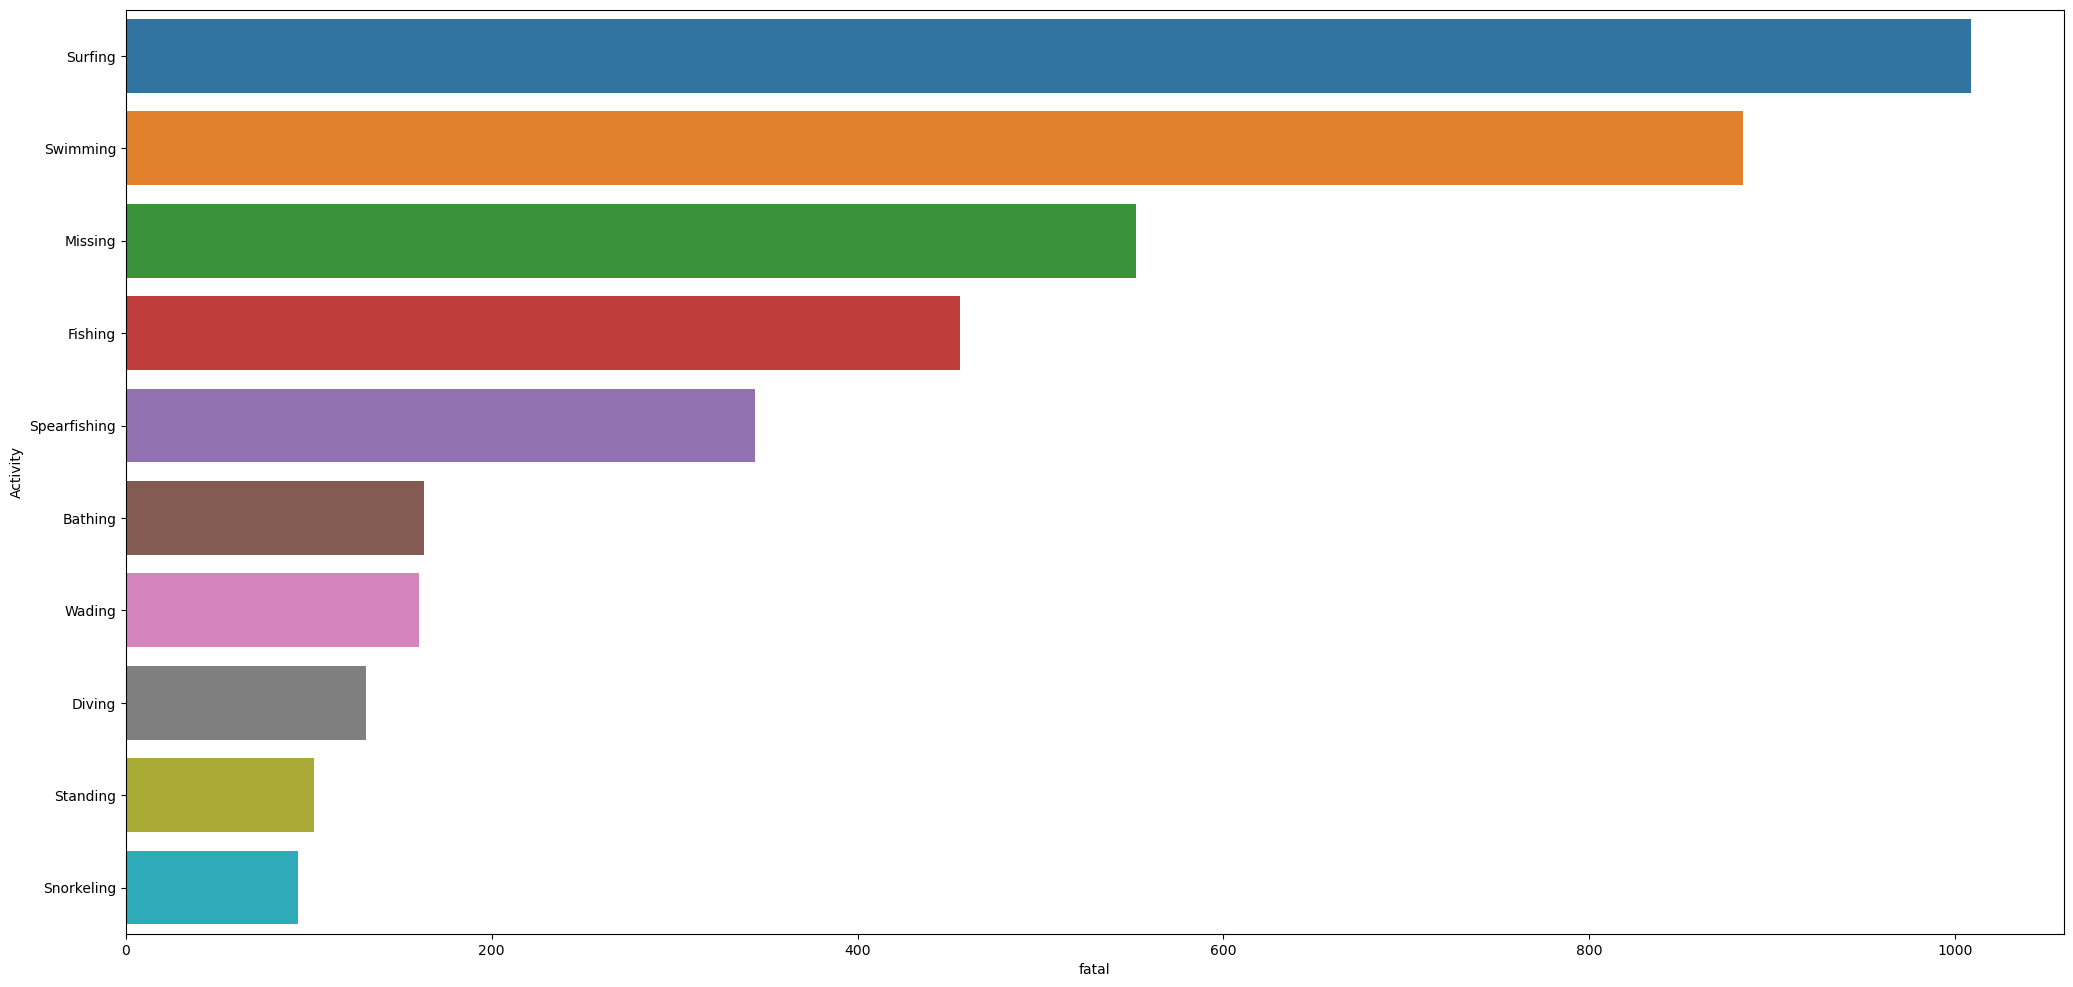

In [46]:
fig=plt.figure(figsize=(25,12))
sns.barplot(data=temp, y="Activity",x="fatal")

In [47]:
temp=sub_df
temp=temp[["Type","fatal"]].groupby(by="Type").count().reset_index(drop=False).sort_values(by="fatal",ascending=False)
temp=temp[10<temp.fatal]
temp

,Type,fatal
8,Unprovoked,4703
3,Provoked,591
1,Invalid,552
10,Watercraft,340
5,SeaDisaster,239


<Axes: xlabel='fatal', ylabel='Type'>

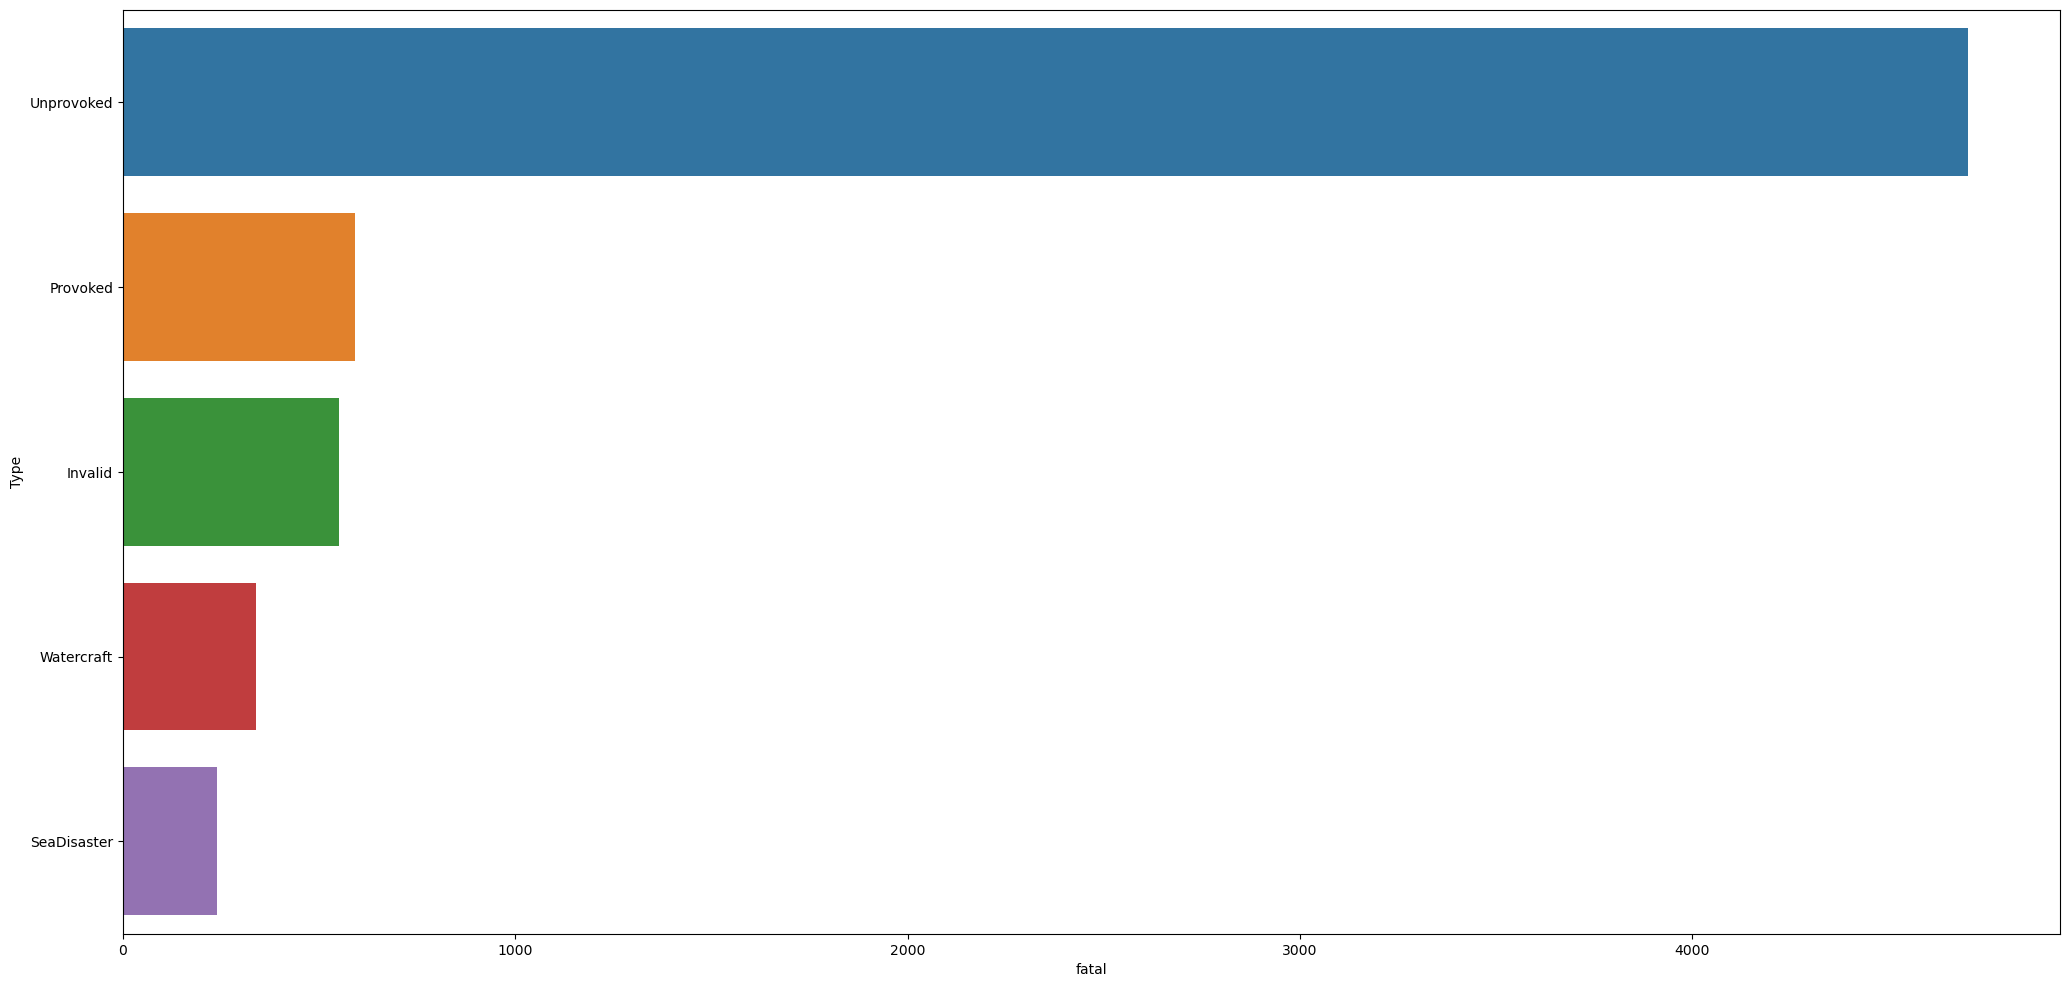

In [48]:
fig=plt.figure(figsize=(25,12))
sns.barplot(data=temp, y="Type",x="fatal")

## high dimension

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
# Create an instance of LabelEncoder
le = LabelEncoder()

## Type

In [51]:
temp=sub_df
temp["Year"]=temp["Year"].apply(convert_str_to_float).copy()
temp["Age"]=temp["Age"].apply(convert_str_to_float).copy()
temp=temp[["Activity","Type","Year","fatal","Age"]]
mask=(1900<temp.Year) &(temp.Year<2019) & (0<temp.Age)
temp=temp[mask]


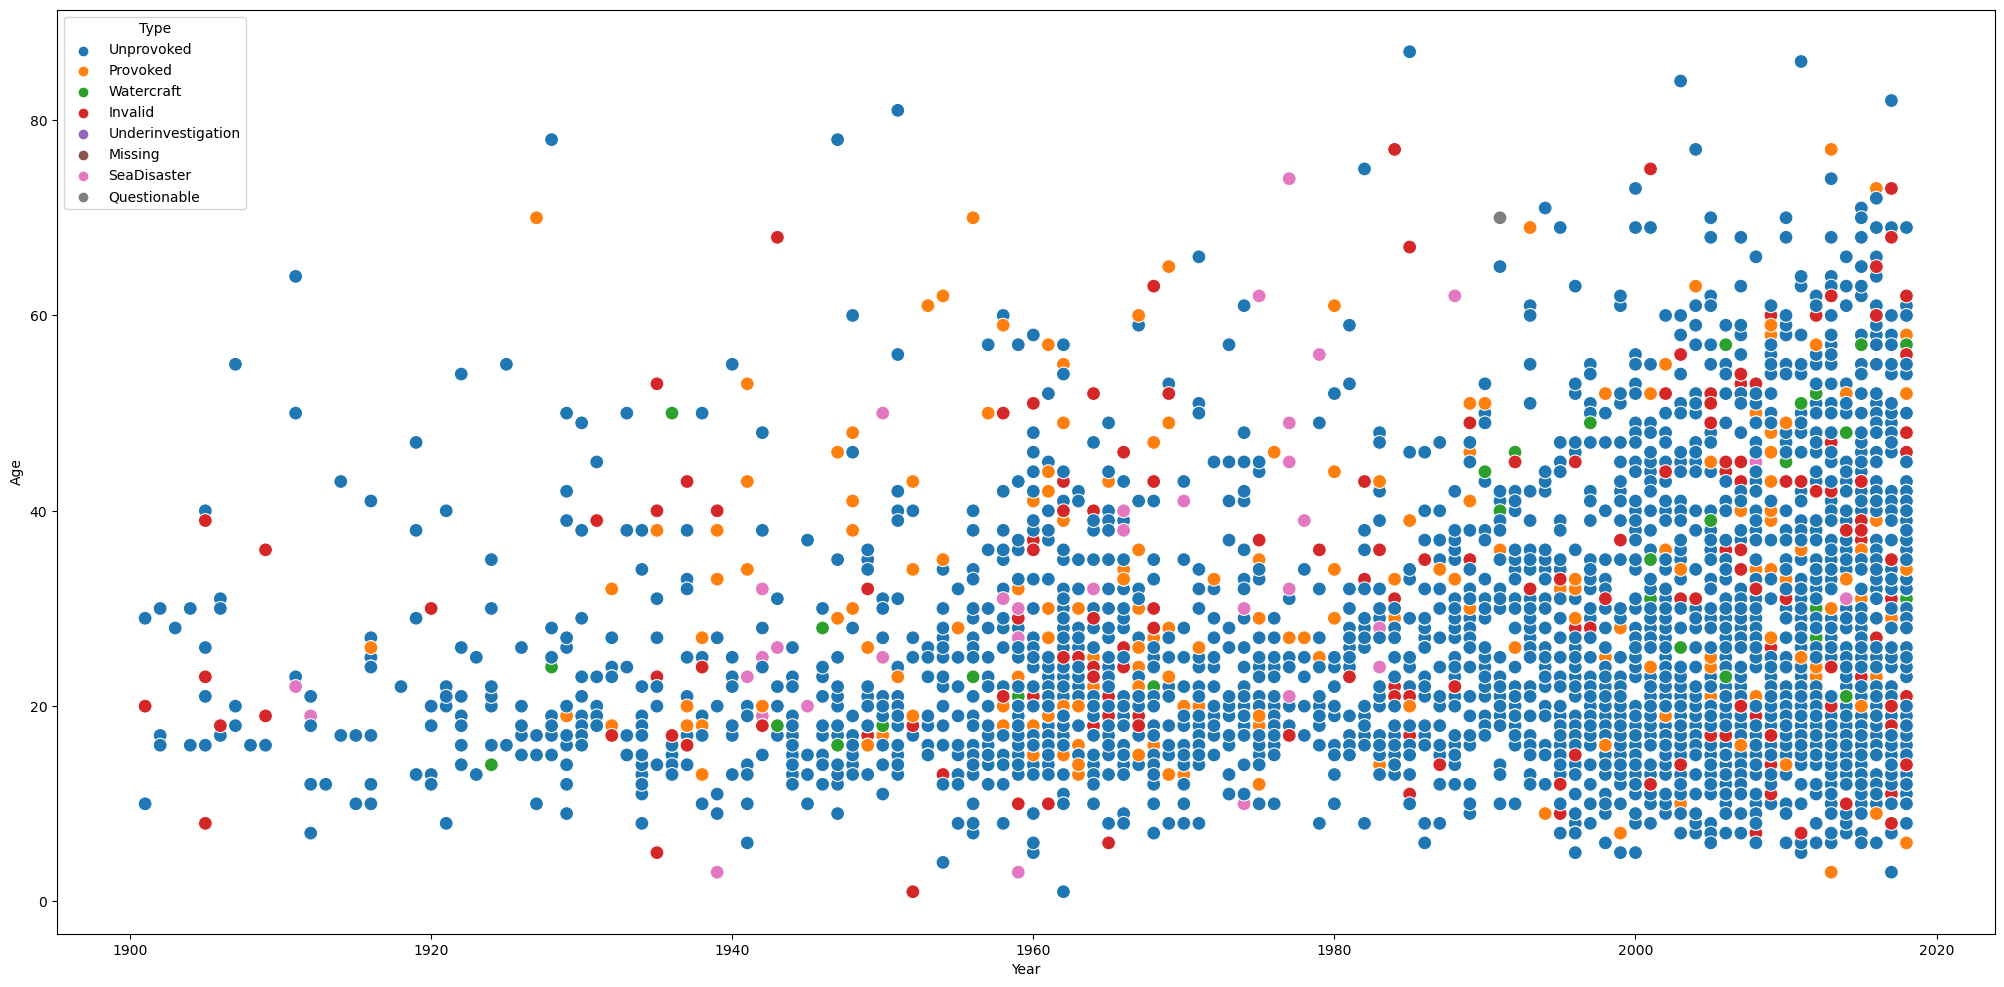

In [52]:
fig, ax = plt.subplots(figsize=(25,12))
sns.scatterplot(data=temp,x="Year", y="Age", hue="Type",legend='auto',s=100,ax=ax)
plt.show()